In [1]:
import comet_ml

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm

import mutils

In [2]:
comet_api = comet_ml.api.API()

In [3]:
exps = comet_api.get("transformer/lonly-asha-500")

In [4]:
errors = []
all_dfs = {}
for exp in tqdm(exps):
    meta = exp.get_metadata()
    start_time = dt.datetime.fromtimestamp(meta['startTimeMillis']/1000.0)
    end_time = dt.datetime.fromtimestamp(meta['endTimeMillis']/1000.0)

    try:
        df = mutils.get_exp_csv(exp.id)
    except FileNotFoundError as e:
        errors.append(e)
    df = mutils.get_epoch_info(df)
    df['dt'] = pd.date_range(start_time, end_time, len(df['valid_1mae']))
    all_dfs[exp.id] = df

100%|██████████| 500/500 [01:21<00:00,  6.14it/s]


In [5]:
completed_dfs = {k: df for k, df in all_dfs.items() if len(df) > 4}
dfs = all_dfs

In [6]:
len(dfs)

500

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


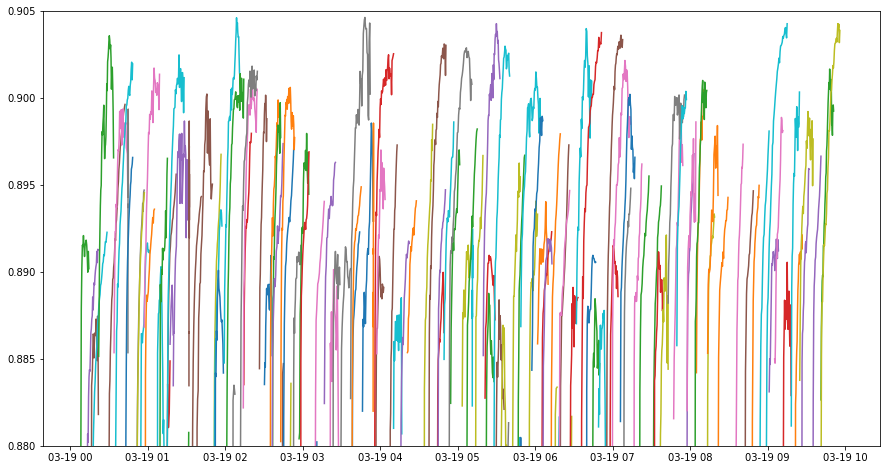

In [7]:
plt.rcParams["figure.figsize"] = (15,8)
for df in dfs.values():
    plt.plot(df['dt'], df['valid_1mae'])
plt.ylim(0.88, 0.905)
plt.show()

In [8]:
maes = []
dts = []
for df in dfs.values():
    i = df['valid_1mae'].argmax()
    maes.append(df['valid_1mae'].iloc[i])
    dts.append(df['dt'].iloc[i].second)

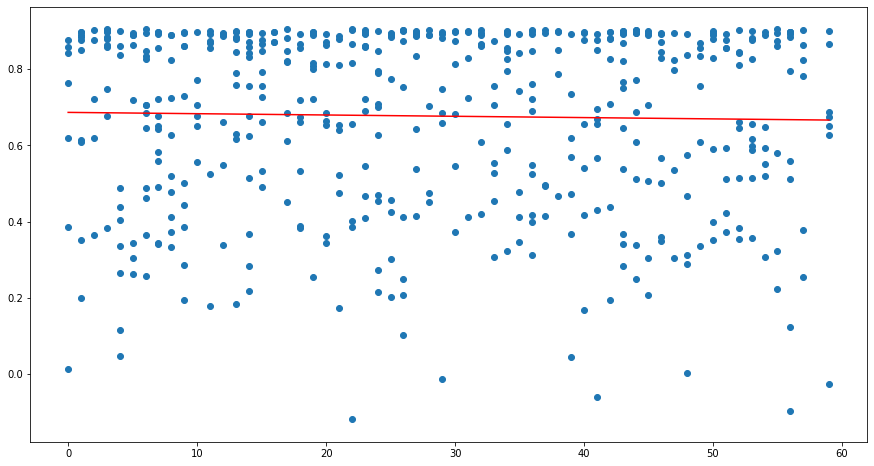

In [10]:
x = dts
y = maes
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='r')
# plt.ylim(0.88, 0.905)
plt.show()